In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
current_pwd = os.getcwd()

possible_paths = [
    '/home/export/soheuny/SRFinder/soheun/notebooks', 
    '/home/soheuny/HH4bsim/soheun/notebooks'
]
    
assert os.getcwd() in possible_paths, f"Did you change the path? It should be one of {possible_paths}"
os.chdir("..")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import torch

from plots import hist_events_by_labels
from events_data import events_from_scdinfo


from fvt_classifier import FvTClassifier


features = [
    "sym_Jet0_pt", "sym_Jet1_pt", "sym_Jet2_pt", "sym_Jet3_pt",
    "sym_Jet0_eta", "sym_Jet1_eta", "sym_Jet2_eta", "sym_Jet3_eta",
    "sym_Jet0_phi", "sym_Jet1_phi", "sym_Jet2_phi", "sym_Jet3_phi",  
    "sym_Jet0_m", "sym_Jet1_m", "sym_Jet2_m", "sym_Jet3_m",
]

In [2]:
def smear_features(X: np.ndarray, noise_scale: float):
    features_min = np.min(X, axis=0)
    features_max = np.max(X, axis=0)
    base_scale = features_max - features_min
    
    accept_mask = np.zeros_like(X, dtype=bool)
    X_smeared = np.zeros_like(X)
    while True:
        X_smeared[~accept_mask] = (X + noise_scale * base_scale * np.random.randn(*X.shape))[~accept_mask]
        accept_mask = (X_smeared >= features_min) & (X_smeared <= features_max)
        if np.all(accept_mask):
            break
        
    return X_smeared

[rank: 0] Seed set to 0
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
[n01:17059] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.n01.3393/jf.0/3793551360/shared_mem_cuda_pool.n01 could be created.
[n01:17059] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If

Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 14.17it/s, v_num=0, val_loss=0.675, train_loss=0.673]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 85/85 [00:06<00:00, 14.10it/s, v_num=0, val_loss=0.675, train_loss=0.673]


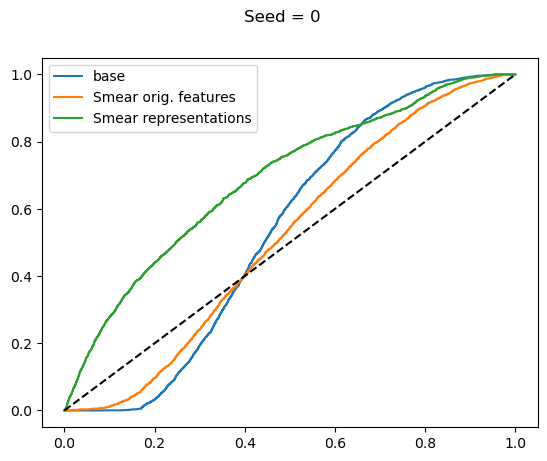

[rank: 0] Seed set to 1
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 85/85 [00:04<00:00, 19.33it/s, v_num=0, val_loss=0.673, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 85/85 [00:04<00:00, 19.19it/s, v_num=0, val_loss=0.673, train_loss=0.675]


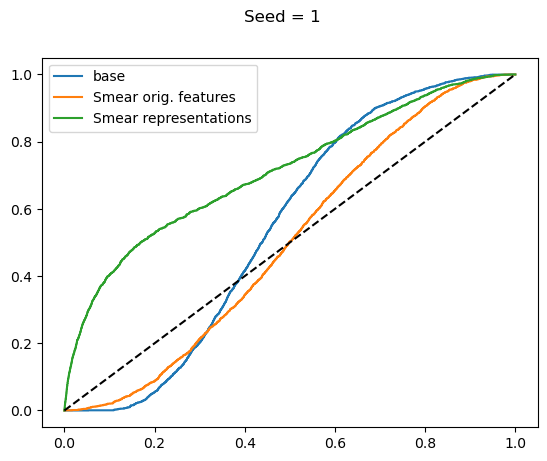

[rank: 0] Seed set to 2
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 6: 100%|██████████| 85/85 [00:04<00:00, 18.05it/s, v_num=0, val_loss=0.677, train_loss=0.673]


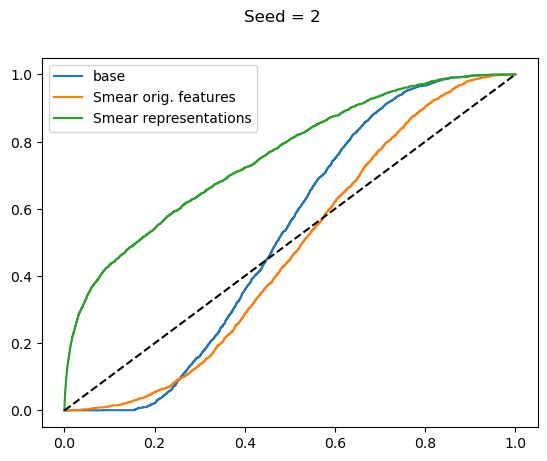

[rank: 0] Seed set to 3
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 15.07it/s, v_num=0, val_loss=0.672, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 14.98it/s, v_num=0, val_loss=0.672, train_loss=0.674]


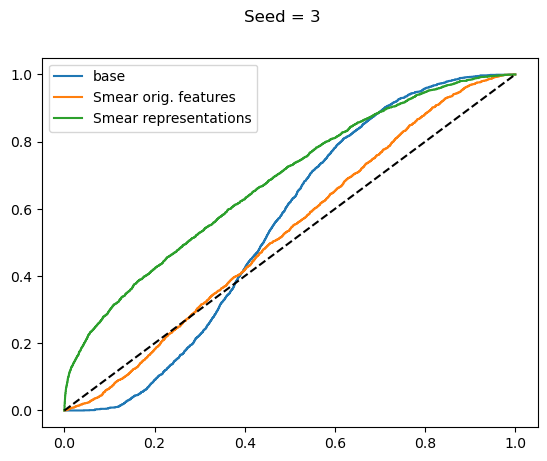

[rank: 0] Seed set to 4
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 85/85 [00:04<00:00, 17.92it/s, v_num=0, val_loss=0.672, train_loss=0.673]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 85/85 [00:04<00:00, 17.80it/s, v_num=0, val_loss=0.672, train_loss=0.673]


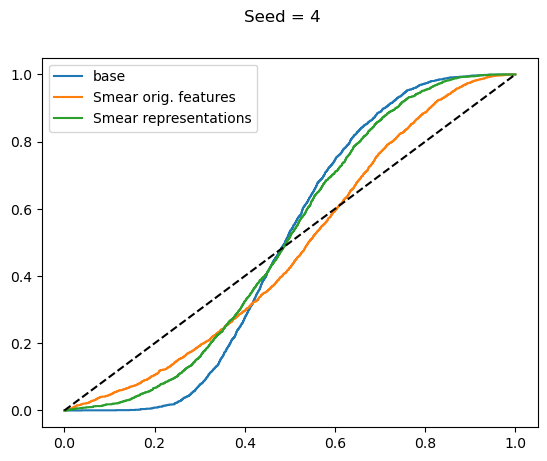

[rank: 0] Seed set to 5
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 8: 100%|██████████| 85/85 [00:06<00:00, 13.83it/s, v_num=0, val_loss=0.675, train_loss=0.674]


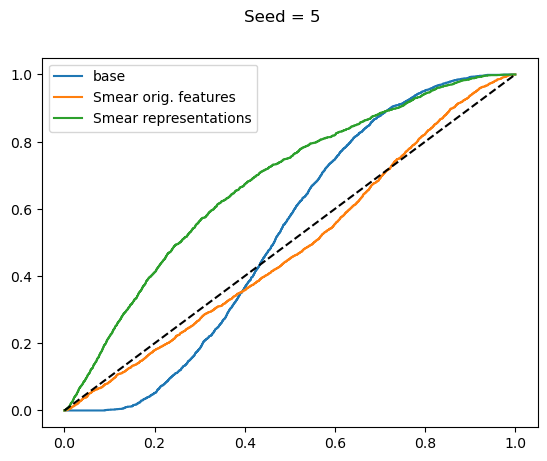

[rank: 0] Seed set to 0
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 15.85it/s, v_num=10, val_loss=0.674, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 15.75it/s, v_num=10, val_loss=0.674, train_loss=0.674]


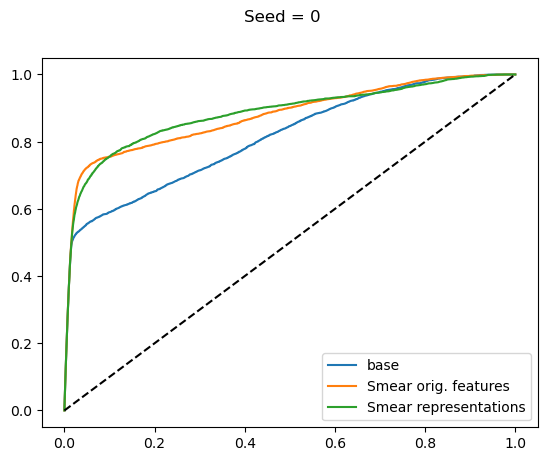

[rank: 0] Seed set to 1
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 85/85 [00:04<00:00, 17.61it/s, v_num=1, val_loss=0.675, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 85/85 [00:04<00:00, 17.49it/s, v_num=1, val_loss=0.675, train_loss=0.674]


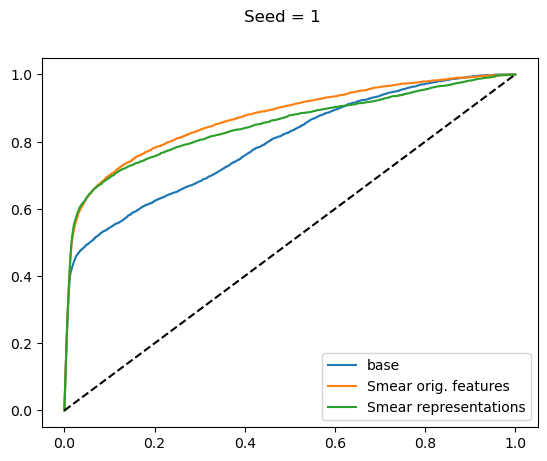

[rank: 0] Seed set to 2
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 15.47it/s, v_num=1, val_loss=0.673, train_loss=0.673]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 15.38it/s, v_num=1, val_loss=0.673, train_loss=0.673]


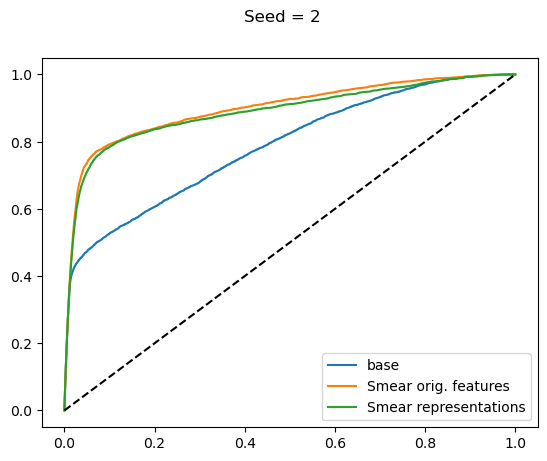

[rank: 0] Seed set to 3
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 85/85 [00:04<00:00, 18.13it/s, v_num=1, val_loss=0.672, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 85/85 [00:04<00:00, 18.00it/s, v_num=1, val_loss=0.672, train_loss=0.674]


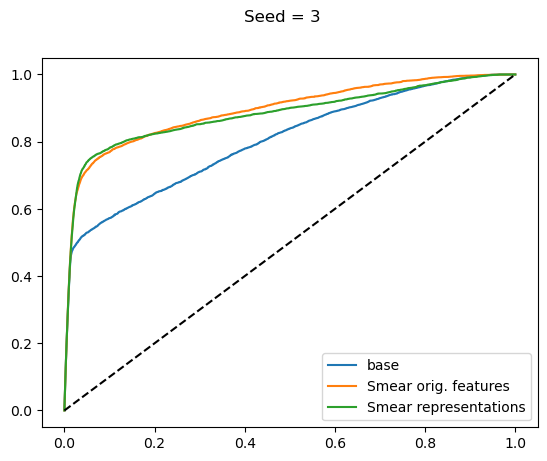

[rank: 0] Seed set to 4
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 14.93it/s, v_num=1, val_loss=0.672, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 14.84it/s, v_num=1, val_loss=0.672, train_loss=0.674]


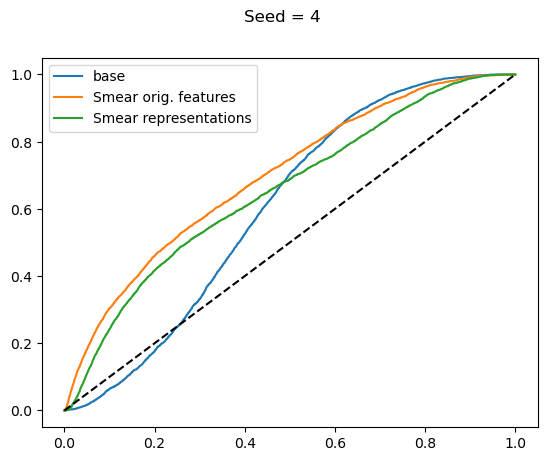

[rank: 0] Seed set to 5
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 16.60it/s, v_num=1, val_loss=0.675, train_loss=0.673]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 85/85 [00:05<00:00, 16.48it/s, v_num=1, val_loss=0.675, train_loss=0.673]


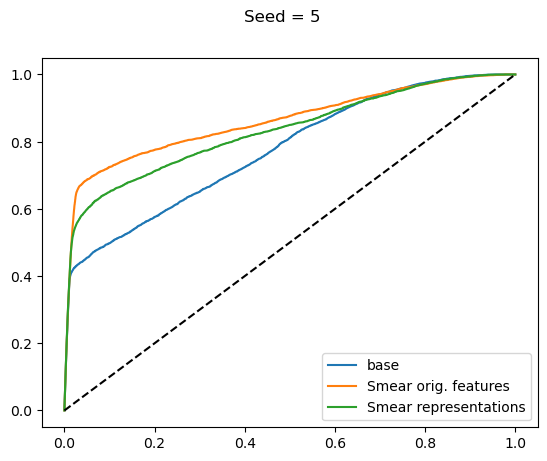

In [ ]:
from itertools import product
import numpy as np
import torch
from fvt_classifier import FvTClassifier
from dataset import generate_mother_dataset, split_scdinfo
from training_info import TrainingInfoV2
from tst_info import TSTInfo
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset

n_3b = 100_0000
device = torch.device("cuda")
experiment_name = "counting_test_v2"
signal_filename = "HH4b_picoAOD.h5"
ratio_4b = 0.5

smear_info = []

for signal_ratio, seed in product([0.01, 0.02], range(6)):
    hparams_filter = {
        "n_3b": n_3b,
        "signal_ratio": signal_ratio,
        "experiment_name": experiment_name,
        "seed": seed,
    }
    hashes = TSTInfo.find(hparams_filter)
    tst_hash = hashes[0]
    tst_info = TSTInfo.load(tst_hash)
    events_tst = events_from_scdinfo(tst_info.scdinfo_tst, features, signal_filename)
    SR_stats = tst_info.SR_stats

    scdinfo_all, df_all = generate_mother_dataset(
            n_3b=n_3b,
            ratio_4b=ratio_4b,
            signal_ratio=signal_ratio,
            signal_filename=signal_filename,
            seed=seed,
        )

    scdinfo_base_fvt, scdinfo_not_base_fvt = split_scdinfo(
            scdinfo_all, tst_info.hparams["base_fvt_train_ratio"], seed
        )

    scdinfo_SR_train, scdinfo_tst = split_scdinfo(
            scdinfo_not_base_fvt, tst_info.hparams["SR_train_ratio"], seed
        )


    # smear_train_scdinfo

    base_fvt_model = FvTClassifier.load_from_checkpoint(f"./data/checkpoints/{tst_info.base_fvt_tinfo_hash}_best.ckpt")
    smeared_fvt_model = FvTClassifier.load_from_checkpoint(f"./data/checkpoints/{tst_info.base_fvt_tinfo_hash}_best.ckpt")

    events_smear = events_from_scdinfo(scdinfo_SR_train, features, signal_filename)
    events_smear_train, events_smear_val = events_smear.split(2/3, seed=seed)

    noise_scale = 0.1
    batch_size = 1024

    events_smear_train.fit_batch_size(batch_size)
    events_smear_val.fit_batch_size(batch_size)

    # base_scale = np.max(events_smear_train.X, axis=0) - np.min(events_smear_train.X, axis=0)
    # X_smeared_train = events_smear_train.X + noise_scale * base_scale * np.random.randn(*events_smear_train.X.shape)
    # X_smeared_val = events_smear_val.X + noise_scale * base_scale * np.random.randn(*events_smear_val.X.shape)

    X_smeared_train = smear_features(events_smear_train.X, noise_scale)
    X_smeared_val = smear_features(events_smear_val.X, noise_scale)

    smeared_fvt_model.fit(
        TensorDataset(torch.tensor(X_smeared_train, dtype=torch.float32), 
                    events_smear_train.is_4b_torch,
                    events_smear_train.weights_torch),
        TensorDataset(torch.tensor(X_smeared_val, dtype=torch.float32),
                        events_smear_val.is_4b_torch,
                        events_smear_val.weights_torch),
        batch_size=batch_size,
        max_epochs=10,
        train_seed=seed,
        save_checkpoint=False
    )

    base_fvt_model.eval()
    smeared_fvt_model.eval()

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    base_fvt_model.to(device)
    smeared_fvt_model.to(device)

    probs_est_4b_base = base_fvt_model.predict(events_tst.X_torch).detach().cpu().numpy()[:, 1]
    probs_est_4b_smeared = smeared_fvt_model.predict(events_tst.X_torch).detach().cpu().numpy()[:, 1]

    dr_4b_base = probs_est_4b_base / (1 - probs_est_4b_base)
    dr_4b_smeared = probs_est_4b_smeared / (1 - probs_est_4b_smeared)
    dr_4b_ratio = dr_4b_base / dr_4b_smeared

    dr_4b_base_argsort = np.argsort(dr_4b_base)[::-1]
    dr_4b_ratio_argsort = np.argsort(dr_4b_ratio)[::-1]
    SR_stats_argsort = np.argsort(tst_info.SR_stats)[::-1]

    is_4b = events_tst.is_4b
    is_signal = events_tst.is_signal
    weights = events_tst.weights

    weights_only_4b = weights * is_4b
    wp_only_4b = weights_only_4b / np.sum(weights_only_4b)
    weights_only_signal = weights * is_signal
    wp_only_signal = weights_only_signal / np.sum(weights_only_signal)

    fig, ax = plt.subplots()
    fig.suptitle(f"Seed = {seed}")
    ax.plot(np.cumsum(wp_only_4b[dr_4b_base_argsort]), np.cumsum(wp_only_signal[dr_4b_base_argsort]), label="base")
    ax.plot(np.cumsum(wp_only_4b[dr_4b_ratio_argsort]), np.cumsum(wp_only_signal[dr_4b_ratio_argsort]), label="Smear orig. features")
    ax.plot(np.cumsum(wp_only_4b[SR_stats_argsort]), np.cumsum(wp_only_signal[SR_stats_argsort]), label="Smear representations")
    ax.plot([0, 1], [0, 1], linestyle="--", color="black")
    ax.legend()
    plt.show()
    plt.close()
    
    smear_info.append({
        "seed": seed,
        "signal_ratio": signal_ratio,
        "events_tst": events_tst,
        "SR_stats": SR_stats,
        "dr_4b_ratio": dr_4b_ratio,
        "dr_4b_base": dr_4b_base,
    })

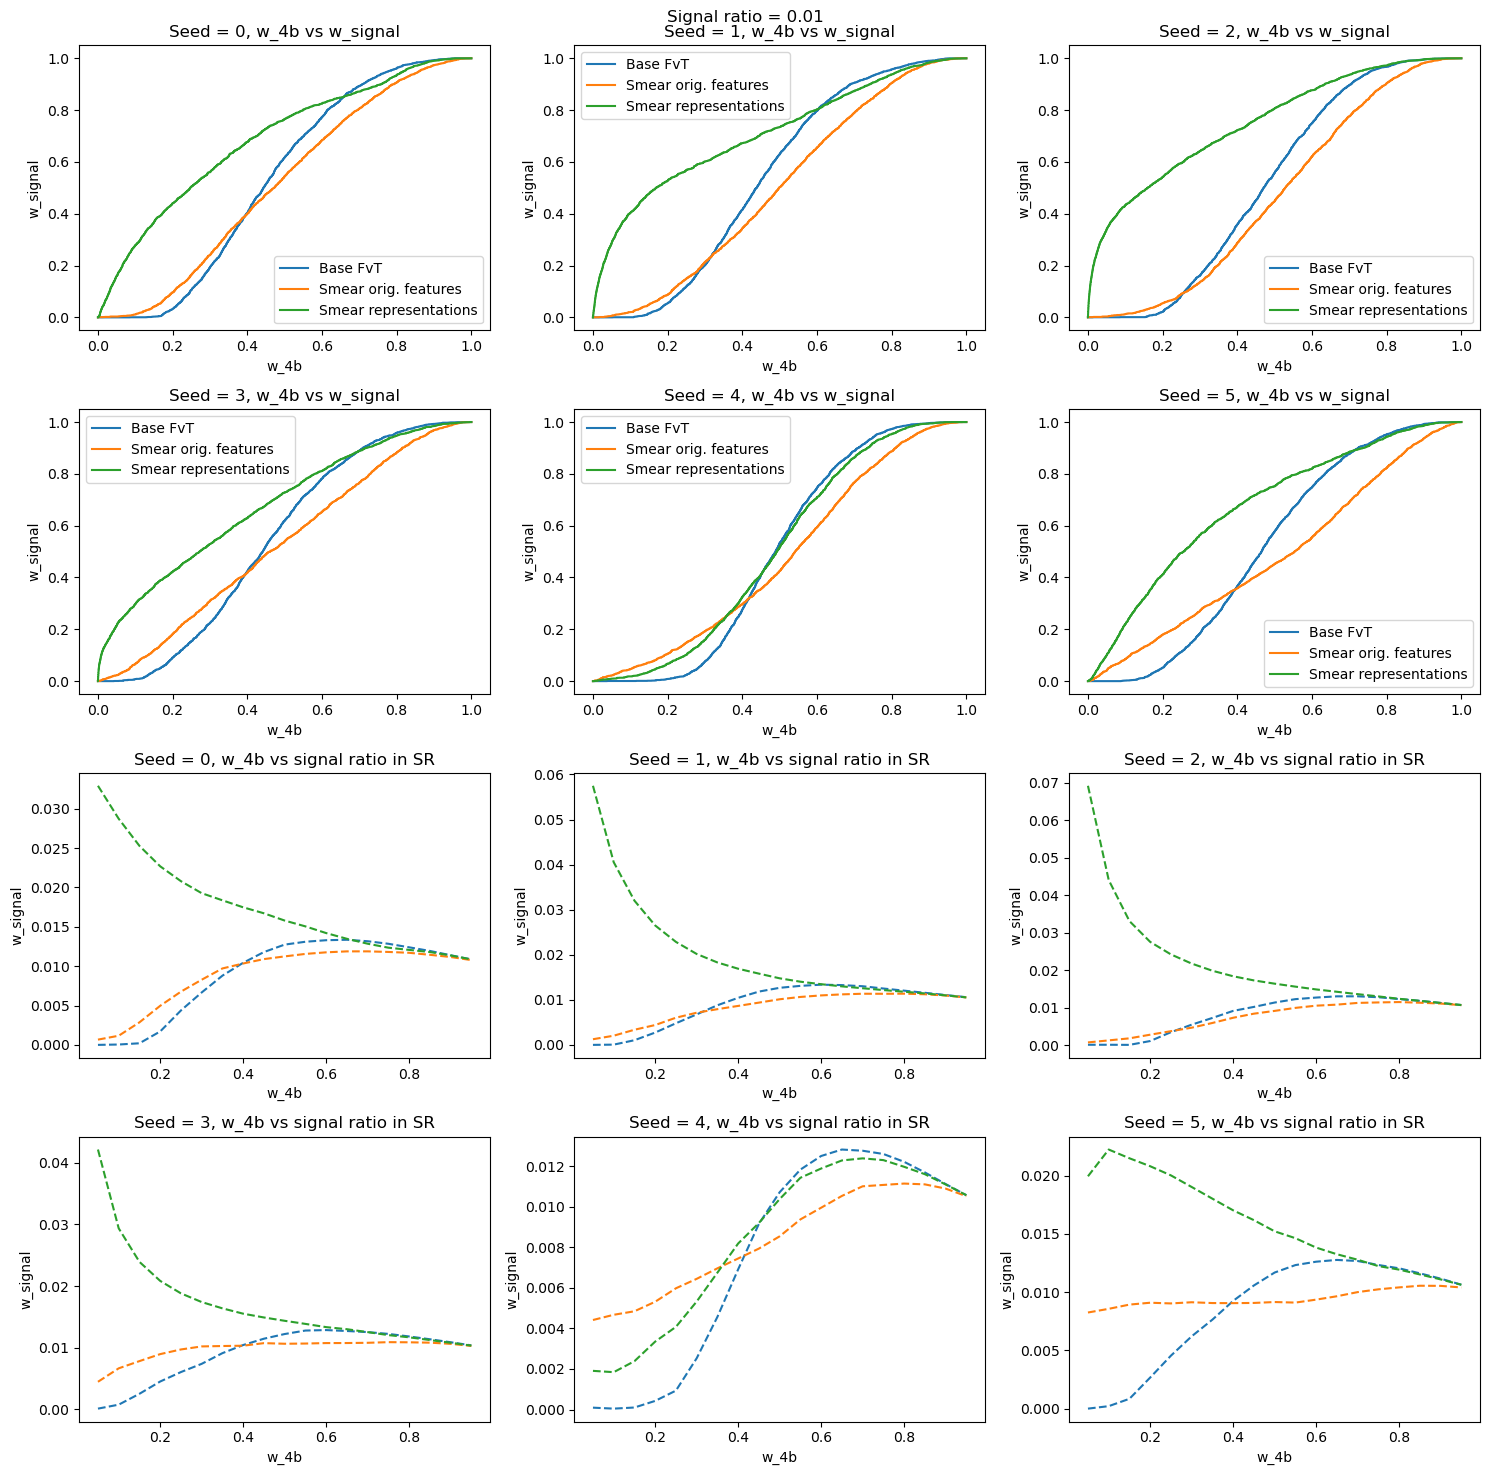

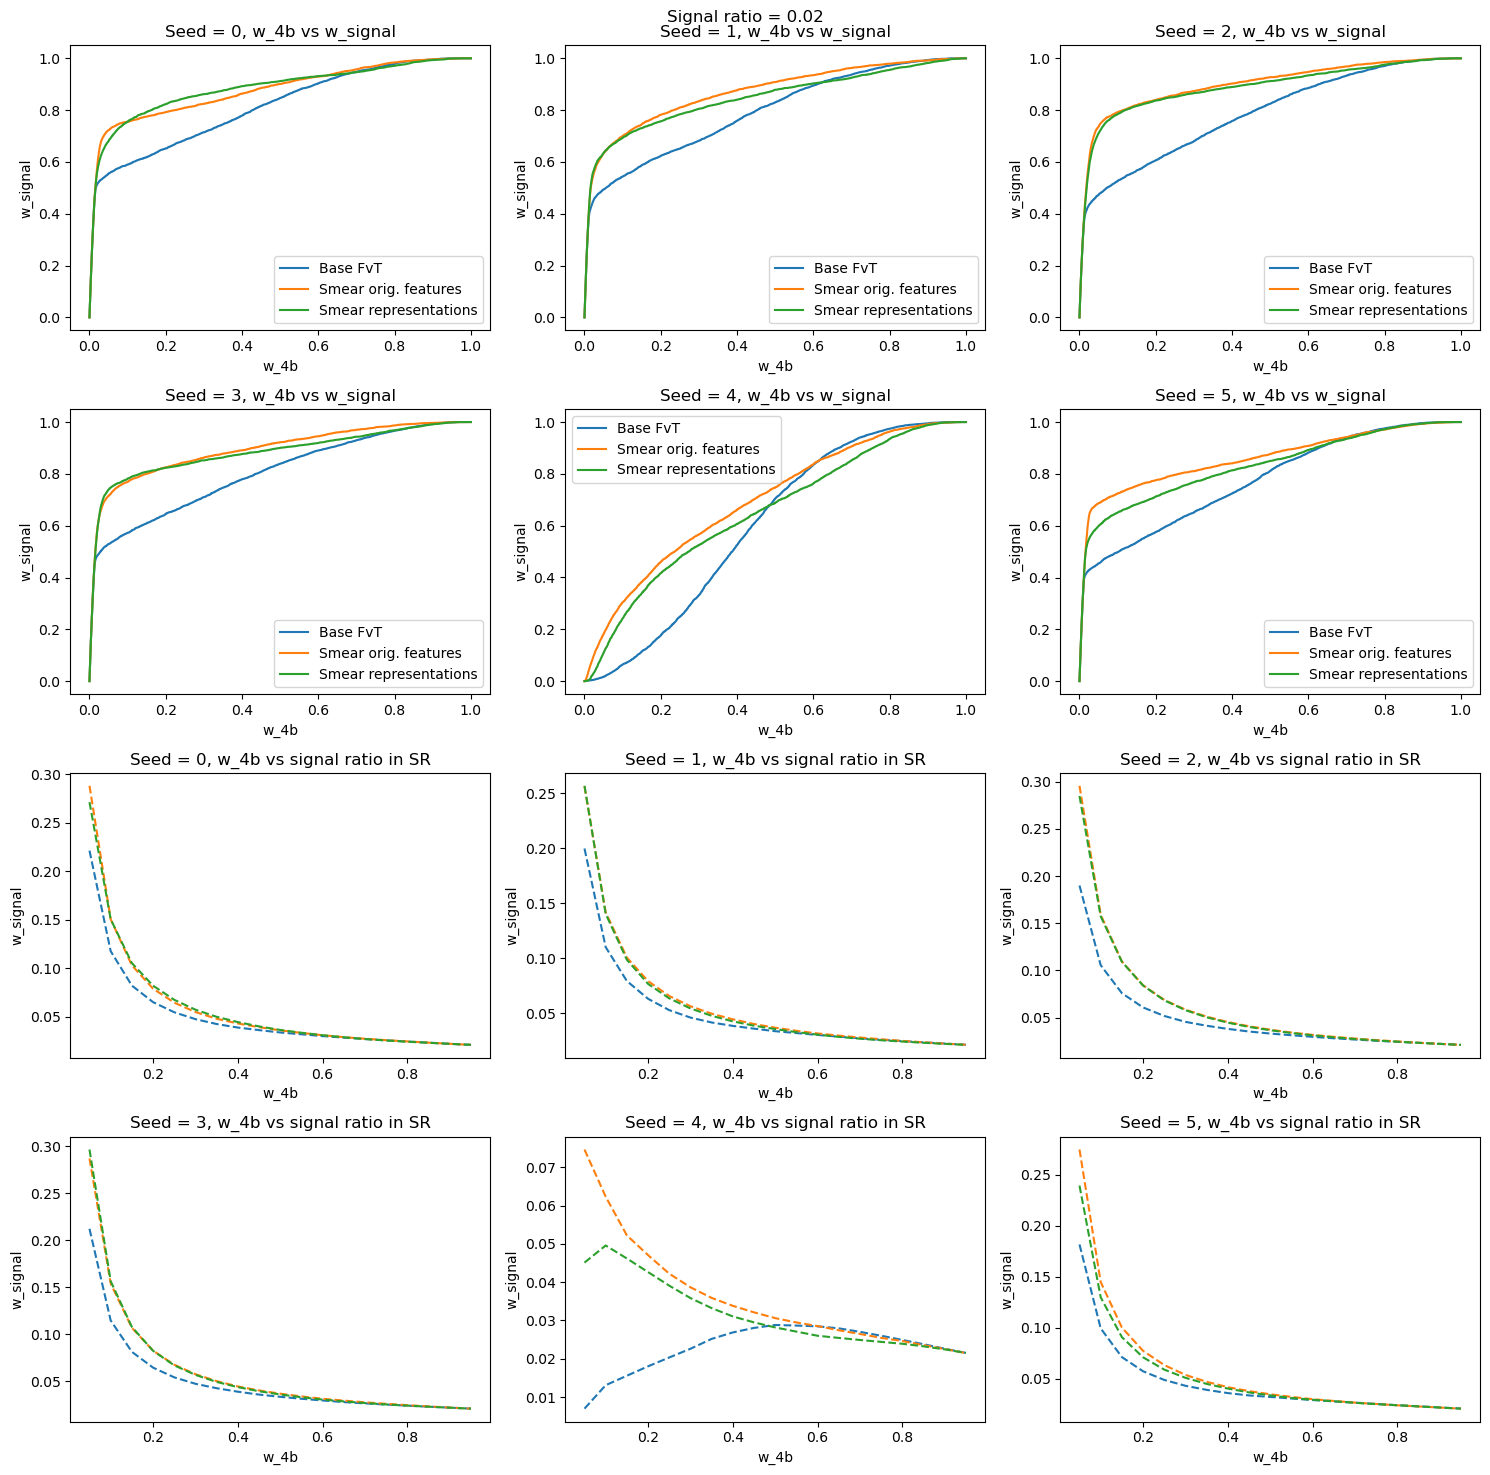

In [39]:
w_4b_ratios = np.arange(1/20, 1, 1/20)

for signal_ratio in [0.01, 0.02]:
    fig = plt.figure(figsize=(15, 15))
    fig.suptitle(f"Signal ratio = {signal_ratio}")
    gs = GridSpec(4, 3)
    
    for i, smear_info_i in enumerate([info for info in smear_info if info["signal_ratio"] == signal_ratio]):
        row = i // 3
        col = i % 3
        current_ax = fig.add_subplot(gs[row, col])
        current_ax2 = fig.add_subplot(gs[row + 2, col])
        
        current_ax.set_title(f"Seed = {smear_info_i['seed']}, w_4b vs w_signal")
        current_ax.set_xlabel("w_4b")
        current_ax.set_ylabel("w_signal")
        
        current_ax2.set_title(f"Seed = {smear_info_i['seed']}, w_4b vs signal ratio in SR")
        current_ax2.set_xlabel("w_4b")
        current_ax2.set_ylabel("w_signal")
        
        dr_4b_base = smear_info_i["dr_4b_base"]
        dr_4b_ratio = smear_info_i["dr_4b_ratio"]
        SR_stats = smear_info_i["SR_stats"]
        
        events_tst = smear_info_i["events_tst"]
        is_4b = events_tst.is_4b
        is_signal = events_tst.is_signal
        weights = events_tst.weights
        
        weights_only_4b = weights * is_4b
        wp_only_4b = weights_only_4b / np.sum(weights_only_4b)
        weights_only_signal = weights * is_signal
        wp_only_signal = weights_only_signal / np.sum(weights_only_signal)
        
        for stat_name, stat_value in {
            "Base FvT": dr_4b_base,
            "Smear orig. features": dr_4b_ratio,
            "Smear representations": SR_stats,
        }.items():
            stat_argsort = np.argsort(stat_value)[::-1]
            current_ax.plot(np.cumsum(wp_only_4b[stat_argsort]), np.cumsum(wp_only_signal[stat_argsort]), label=stat_name)
            
            w_signal_at_4b = []
            for w_4b_ratio in w_4b_ratios:
                idx = np.argmax(np.cumsum(wp_only_4b[stat_argsort]) > w_4b_ratio)
                w_signal_at_4b.append(np.sum(weights_only_signal[stat_argsort[:idx]]) / np.sum(weights_only_4b[stat_argsort[:idx]]))
            
            current_ax2.plot(w_4b_ratios, w_signal_at_4b, label=stat_name, linestyle="--")            
            
        current_ax.legend()
    
    plt.tight_layout()
    plt.show()
    plt.close()

# Train 4b / 4b smeared

In [5]:
from training_info import TrainingInfoV2
from tst_info import TSTInfo
from events_data import events_from_scdinfo
from fvt_classifier import FvTClassifier
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split


noise_scales = [0.01, 0.02, 0.03, 0.05, 0.1]
seeds = [0, 1, 2]
signal_ratios = [0.01, 0.02]
signal_filename = "HH4b_picoAOD.h5"

hparams_filter = {
    "n_3b": 100_0000,
    "signal_ratio": lambda x: x in signal_ratios,
    "seed": lambda x: x in seeds,
    "experiment_name": "counting_test_v2",
}
hashes = TSTInfo.find(hparams_filter, sort_by=["signal_ratio", "seed"])

for tst_hash in hashes:
    tst_info = TSTInfo.load(tst_hash)
    signal_ratio = tst_info.hparams["signal_ratio"]
    seed = tst_info.hparams["seed"]
    
    base_fvt_tinfo = TrainingInfoV2.load(tst_info.base_fvt_tinfo_hash)
    events_base = events_from_scdinfo(base_fvt_tinfo.scdinfo, features, signal_filename)
    # get 4b events
    is_4b = events_base.is_4b
    events_base_4b = events_base[is_4b]

    # split events_base_4b to orig and smeared
    events_base_4b_orig, events_base_4b_smeared = events_base_4b.split(0.5, seed=seed)

    # smear features
    for noise_scale in noise_scales:
        print(f"noise_scale: {noise_scale}")
        X_smeared_base_4b = smear_features(events_base_4b_smeared.X, noise_scale)
        # merge orig and smeared
        X_4b = np.concatenate([events_base_4b_orig.X, X_smeared_base_4b], axis=0)
        is_smeared = np.concatenate([np.zeros_like(events_base_4b_orig.is_4b), np.ones_like(events_base_4b_smeared.is_4b)])
        w_4b = np.concatenate([events_base_4b_orig.weights, events_base_4b_smeared.weights], axis=0)

        # split into train and val
        from sklearn.model_selection import train_test_split

        X_4b_train, X_4b_val, w_4b_train, w_4b_val, is_smeared_train, is_smeared_val = train_test_split(
            X_4b, w_4b, is_smeared, test_size=1/3, random_state=seed
        )

        # fit batch size
        batch_size = 1024
        X_4b_train = X_4b_train[len(X_4b_train) % batch_size:]
        X_4b_val = X_4b_val[len(X_4b_val) % batch_size:]
        w_4b_train = w_4b_train[len(w_4b_train) % batch_size:]
        w_4b_val = w_4b_val[len(w_4b_val) % batch_size:]
        is_smeared_train = is_smeared_train[len(is_smeared_train) % batch_size:]
        is_smeared_val = is_smeared_val[len(is_smeared_val) % batch_size:]

        ovs_model = FvTClassifier(
                num_classes=2,
                dim_input_jet_features=4,
                dim_dijet_features=6,
                dim_quadjet_features=6,
                run_name="",
                device=torch.device("cuda:0"),
                lr=1e-3,
            )

        # train 4b / 4b smeared
        ovs_model.fit(
            TensorDataset(torch.tensor(X_4b_train, dtype=torch.float32), 
                        torch.tensor(is_smeared_train, dtype=torch.long),
                        torch.tensor(w_4b_train, dtype=torch.float32)),
            TensorDataset(torch.tensor(X_4b_val, dtype=torch.float32),
                        torch.tensor(is_smeared_val, dtype=torch.long),
                        torch.tensor(w_4b_val, dtype=torch.float32)),
            batch_size=1024,
            max_epochs=20,
            train_seed=seed,
            save_checkpoint=False
        )
        # print AUC curve on validation set
        from sklearn.metrics import roc_curve, auc

        # Get predictions on validation set
        ovs_model.eval()
        ovs_model.to(device)
        with torch.no_grad():
            val_preds = ovs_model.predict(torch.tensor(X_4b_val, dtype=torch.float32).to(ovs_model.device))
            val_preds = val_preds.cpu().numpy()[:, 1]  # Probability of being smeared
        
        events_tst = events_from_scdinfo(tst_info.scdinfo_tst, features, signal_filename)
        events_tst_4b = events_tst[events_tst.is_4b]
        events_tst_4b_orig, events_tst_4b_smeared = events_tst_4b.split(0.5, seed=seed)

        X_smeared_tst_4b = smear_features(events_tst_4b_smeared.X, noise_scale)
        is_smeared_tst = np.concatenate([np.zeros_like(events_tst_4b_orig.is_4b), np.ones_like(events_tst_4b_smeared.is_4b)])
        X_tst = np.concatenate([events_tst_4b_orig.X, X_smeared_tst_4b], axis=0)


        ovs_model.eval()
        ovs_model.to(device)
        with torch.no_grad():
            probs_est_smeared_tst = ovs_model.predict(
                torch.tensor(X_tst, dtype=torch.float32).to(ovs_model.device)).detach().cpu().numpy()[:, 1]
            
        fig, ax = plt.subplots()
        fig.suptitle(f"Seed = {seed}, noise_scale = {noise_scale}")
        hist_events_by_labels(events_tst_4b, probs_est_smeared_tst, bins=20, ax=ax)
        ax.set_yscale("log")
        ax.legend()
        plt.show()
        plt.close()

        sort_idx = np.argsort(probs_est_smeared_tst)[::-1]
        w_signal_ratio = np.cumsum((events_tst_4b.weights * events_tst_4b.is_signal)[sort_idx]) / np.sum(events_tst_4b.weights * events_tst_4b.is_signal)
        w_4b_ratio = np.cumsum((events_tst_4b.weights * events_tst_4b.is_4b)[sort_idx]) / np.sum(events_tst_4b.weights * events_tst_4b.is_4b)
        
        fig, ax = plt.subplots()
        fig.suptitle(f"Seed = {seed}, noise_scale = {noise_scale}")
        ax.plot(w_4b_ratio, w_signal_ratio)
        ax.plot([0, 1], [0, 1], linestyle="--", color="black")
        ax.set_xlabel("4b / total")
        ax.set_ylabel("signal / total")
        plt.show()
        plt.close()

noise_scale: 0.01


[rank: 0] Seed set to 0
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
[n01:141198] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.n01.3393/jf.0/1397030912/shared_mem_cuda_pool.n01 could be created.
[n01:141198] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: 

Epoch 13:  20%|█▉        | 106/534 [00:03<00:13, 32.49it/s, v_num=809, val_loss=0.511, train_loss=0.520]

/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


NameError: name 'device' is not defined

# Train FvT and smear on the learned feature space. 

noise_scale: 0.05


/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/export/soheuny/.conda/envs/coffea_torch/lib/py ...
[n01:187182] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.n01.3393/jf.0/2687369216/shared_mem_cuda_pool.n01 could be created.
[n01:187182] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/export/soheuny/.conda/envs/coffea_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to 

Epoch 29: 100%|██████████| 44/44 [00:02<00:00, 16.19it/s, avg_val_loss=0.641]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 44/44 [00:02<00:00, 16.18it/s, avg_val_loss=0.641]


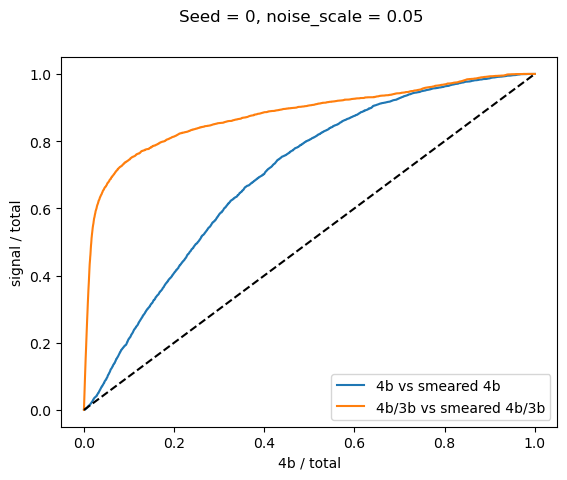

noise_scale: 0.1


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]


Epoch 29: 100%|██████████| 44/44 [00:02<00:00, 17.79it/s, avg_val_loss=0.493]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 44/44 [00:02<00:00, 17.78it/s, avg_val_loss=0.493]


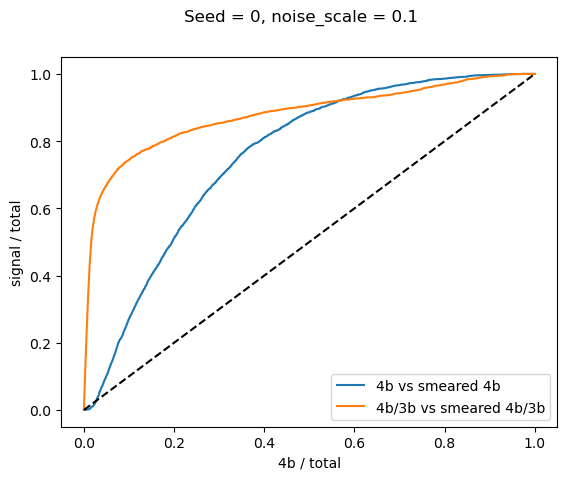

noise_scale: 0.2


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [5]


Epoch 29: 100%|██████████| 44/44 [00:02<00:00, 15.71it/s, avg_val_loss=0.219]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 44/44 [00:02<00:00, 15.70it/s, avg_val_loss=0.219]


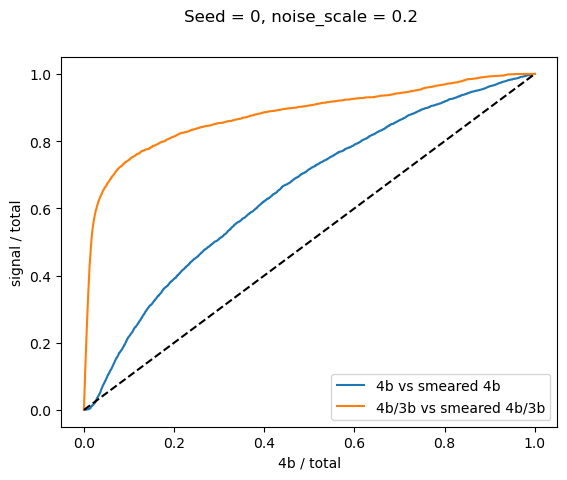

In [3]:
from smearing import AttentionClassifier
from training_info import TrainingInfoV2
from tst_info import TSTInfo
from events_data import events_from_scdinfo
from fvt_classifier import FvTClassifier
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split

from dataset import generate_mother_dataset, split_scdinfo

n_3b = 100_0000
device = torch.device("cuda")
experiment_name = "counting_test_v2"
signal_filename = "HH4b_picoAOD.h5"
ratio_4b = 0.5
seed = 0
signal_ratio = 0.02
ratio_4b = 0.5
noise_scales = [0.05, 0.1, 0.2]

hparams_filter = {
    "n_3b": n_3b,
    "signal_ratio": signal_ratio,
    "experiment_name": experiment_name,
    "seed": seed,
}
hashes = TSTInfo.find(hparams_filter)
tst_hash = hashes[0]

tst_info = TSTInfo.load(tst_hash)


scdinfo_all, df_all = generate_mother_dataset(
        n_3b=n_3b,
        ratio_4b=ratio_4b,
        signal_ratio=signal_ratio,
        signal_filename=signal_filename,
        seed=seed,
    )

scdinfo_base_fvt, scdinfo_not_base_fvt = split_scdinfo(
        scdinfo_all, tst_info.hparams["base_fvt_train_ratio"], seed
    )

scdinfo_SR_train, scdinfo_tst = split_scdinfo(
        scdinfo_not_base_fvt, tst_info.hparams["SR_train_ratio"], seed
    )

base_fvt_model = FvTClassifier.load_from_checkpoint(f"./data/checkpoints/{tst_info.base_fvt_tinfo_hash}_best.ckpt")
base_fvt_model.eval()
base_fvt_model.to(device)

events_tst = events_from_scdinfo(tst_info.scdinfo_tst, features, signal_filename)
events_tst.set_model_scores(base_fvt_model)

events_SR_train = events_from_scdinfo(scdinfo_SR_train, features, signal_filename)
events_SR_train.set_model_scores(base_fvt_model)
events_SR_train_4b = events_SR_train[events_SR_train.is_4b]
events_SR_train_orig, events_SR_train_smeared = events_SR_train_4b.split(0.5, seed=seed)

q_repr_ovs_smeared = events_SR_train_smeared.q_repr
# smear features
for noise_scale in noise_scales:
    print(f"noise_scale: {noise_scale}")
    q_repr_ovs_smeared = smear_features(q_repr_ovs_smeared, noise_scale)

    q_repr_ovs = np.concatenate([events_SR_train_orig.q_repr, q_repr_ovs_smeared], axis=0)
    is_smeared_ovs = np.concatenate([np.zeros(len(events_SR_train_orig)), np.ones(len(events_SR_train_smeared))])
    w_ovs = np.concatenate([events_SR_train_orig.weights, events_SR_train_smeared.weights], axis=0)

    # train attention classifier
    ovs_classifier = AttentionClassifier(
        input_size=6,
        num_classes=2,
        learning_rate=1e-3,
        random_state=seed)

    ovs_classifier.fit(q_repr_ovs, is_smeared_ovs, w_ovs, max_epochs=30)
    ovs_classifier.eval()
    ovs_classifier.to(device)

    SR_stats_4b = tst_info.SR_stats[events_tst.is_4b]
    events_tst_4b = events_tst[events_tst.is_4b]
    probs_est_smeared_tst = ovs_classifier.predict(torch.tensor(events_tst_4b.q_repr, dtype=torch.float32).to(device))[:, 1]

    fig, ax = plt.subplots()
    fig.suptitle(f"Seed = {seed}, noise_scale = {noise_scale}")
    for stat_name, stat_value in {
        "4b vs smeared 4b": probs_est_smeared_tst,
        "4b/3b vs smeared 4b/3b": SR_stats_4b,
    }.items():
        stats_argsort = np.argsort(stat_value)[::-1]
        ax.plot(np.cumsum(events_tst_4b.weights[stats_argsort]) / np.sum(events_tst_4b.weights), 
                np.cumsum(events_tst_4b.is_signal[stats_argsort]) / np.sum(events_tst_4b.is_signal), label=stat_name)
    ax.plot([0, 1], [0, 1], linestyle="--", color="black")
    ax.set_xlabel("4b / total")
    ax.set_ylabel("signal / total")
    ax.legend()
    plt.show()
    plt.close()
        

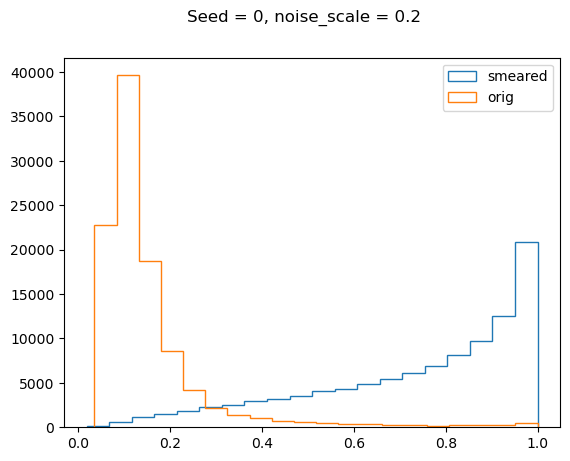

In [16]:
is_smeared_tst = np.random.choice([0, 1], size=len(events_tst_4b), p=[0.5, 0.5])
q_repr_tst = events_tst_4b.q_repr
q_repr_tst[is_smeared_tst==1] = smear_features(q_repr_tst[is_smeared_tst==1], noise_scale)

probs_est_smeared_tst_rrrrr = ovs_classifier.predict(torch.tensor(q_repr_tst, dtype=torch.float32).to(device))[:, 1]

fig, ax = plt.subplots()
fig.suptitle(f"Seed = {seed}, noise_scale = {noise_scale}")
ax.hist(probs_est_smeared_tst_rrrrr[is_smeared_tst==1], bins=20, label="smeared", histtype="step")
ax.hist(probs_est_smeared_tst_rrrrr[is_smeared_tst==0], bins=20, label="orig", histtype="step")
ax.legend()
plt.show()